Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [1]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 13:04:52--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’

root_v6.13.08.Linux 100%[===================>] 131.05M  26.0MB/s    in 5.8s    

2020-03-09 13:04:58 (22.5 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.2’ saved [137415272/137415272]



In [6]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

<CDLL '/content/APPS/root/lib/libGraf3d.so', handle 55bc95231700 at 7f2f04633090>

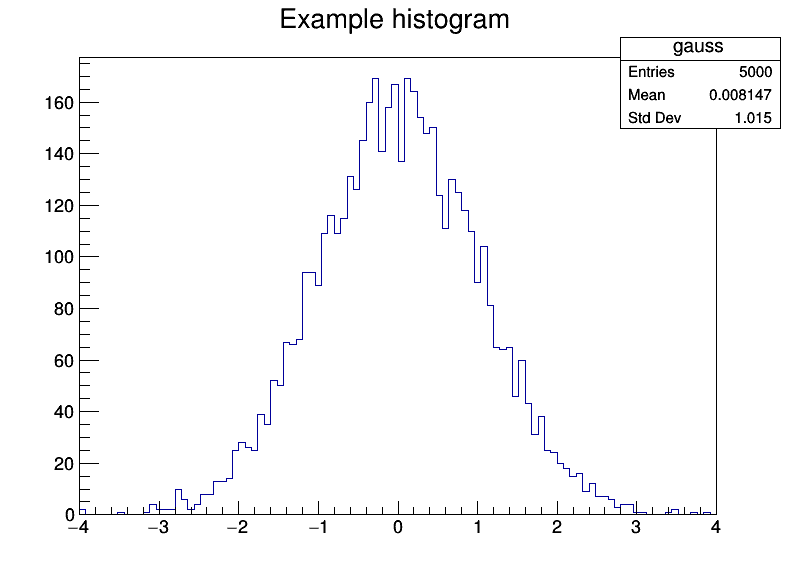

In [5]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()


All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [3]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root


--2020-03-09 13:05:05--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.185.82.144, 188.184.28.138, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.185.82.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.1’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  21.5MB/s    in 24s     

2020-03-09 13:05:29 (17.5 MB/s) - ‘B2HHH_MagnetUp.root.1’ saved [444723234/444723234]



In [0]:
# !strace python -c 'import ROOT; ROOT.kRed' |& grep libMathCore.so
# ! locate libTreePlayer.so
# ! sudo rmdir APPS
# ! rm -r APPS/root
# ! rmdir APPS

In [0]:
# since root is useless for the kind of data analysis we want
!pip install root_pandas
# !pip install root_numpy 
# import root_pandas
# import root_numpy

Welcome to JupyROOT 6.13/08


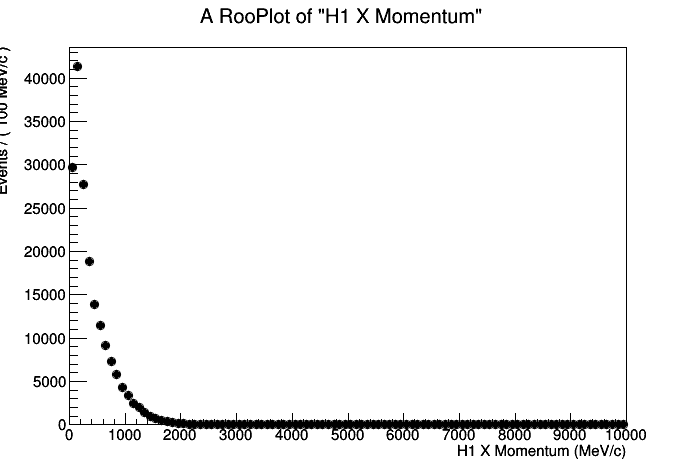

In [4]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
# import root_pandas
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
# df = root_pandas.read_root("DATA/B2HHH_MagnetUp.root")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

Now plot the total momentum for one (or more) of the daughter particles.

In [0]:
################### HELPER FUNCTIONS #################################

c = 299792458
mass = 493.677

def get_daughter_momentum(daughter):
  p = "sqrt(("+daughter+"_PX)**2+ ("+daughter+"_PY)**2 + ("+daughter+"_PZ)**2)" #do we add daughter to momentum just to specify the momentum of which particle we need to take into account
  return p  

#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily
def get_energy(daughter):
  e = "sqrt("+get_daughter_momentum(daughter)+"**2+"+str(mass)+"**2)"
  return e

def get_mother_momentum():
  X = "H1_PX+"+"H2_PX+"+"H3_PX"
  Y = "H1_PY+"+"H2_PY+"+"H3_PY"
  Z = "H1_PZ+"+"H2_PZ+"+"H3_PZ"
  p ="(sqrt("+X+"**2+"+Y+"**2+"+Z+"**2))"
  return p

def get_mother_energy():
  e = get_energy('H1')+"+"+get_energy('H2')+"+"+get_energy('H3')
  return e


def get_mass():
  return "sqrt("+get_mother_energy()+"**2-"+get_mother_momentum()+"**2)"


#Graphs

In [0]:

# tree.Draw(get_daughter_momentum('H1')+">>histogram(100,400,600)")
# tree.Draw(get_energy('H1')+">>histogram(100,400,600)")
# # tree.Draw(get_mass()+">>histogram(100,400,600)")
# tree.Draw(get_mother_momentum()+">>histogram(100,400,600)")
# tree.Draw(get_mother_energy()+">>histogram(100,400,600)")

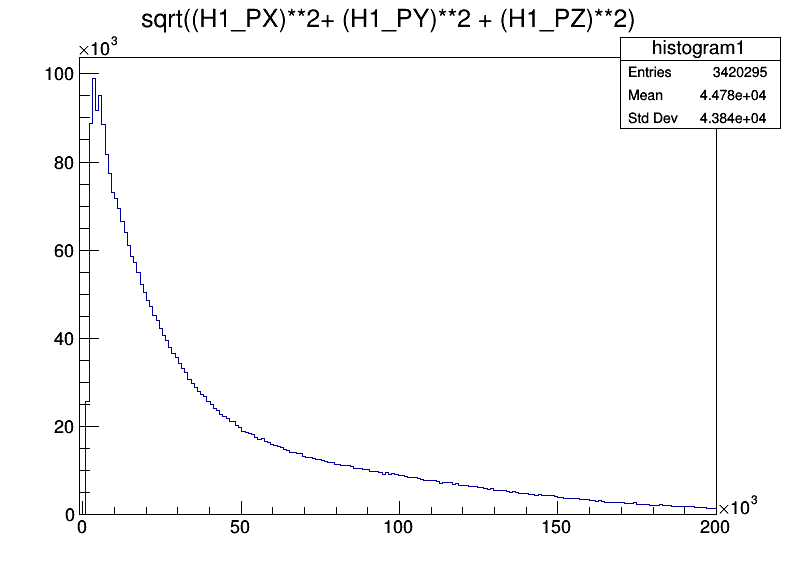

In [0]:
# To use ROOT at least a little bit, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(get_daughter_momentum('H1')+">>histogram1(200,-1000,200000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

In [0]:
# let's repeat the same step for the next particle
import ROOT
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H2')+">>histogram1(200,0,120000)")
c.Draw()

In [0]:
#Now for the third
import ROOT
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H3')+">>histogram1(200,-10000,400000)")
print(tree.Branch("sqrt(H3_PX**2+H3_PY**2+H3_PZ**2)"))
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

In [0]:
# now we'll look the the combined momenta
import ROOT
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
tree=f.Get("DecayTree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_daughter_momentum('H1')+"+"+get_daughter_momentum('H1')+"+"+get_daughter_momentum('H1')+">>histogram1(200,-10000,400000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

In [0]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_energy("H1")+">>histogram(100,0,100000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.

In [0]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
tree.Draw(get_mother_momentum()+">>histogram1(200,-10000,400000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c.Draw()

 file probably overwritten: stopping reporting error messages


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Error R__unzip_header: error in header.  Values: 3f89
Error in <TBasket::ReadBasketBuffers>: Inconsistency found in header (nin=0, nbuf=0)
Error R__unzip_header: error in header.  Values: 00
Error in <TBasket::ReadBasketBuffers>: Inconsistency found in header (nin=0, nbuf=0)
Error in <TBasket::Streamer>: The value of fNbytes is incorrect (-14174892) ; trying to recover by setting it to zero
Error in <TBasket::TBasket::Streamer>: The value of fNevBufSize (-1539340958) or fIOBits (153) is incorrect ; setting the buffer to a zombie.
tcmalloc: large alloc 1823457280 bytes == 0x55bcbdf0c000 @  0x7f2f37052887 0x7f2f1387a65b 0x7f2f12b00d89 0x7f2f12afcf69 0x7f2f124818f7 0x7f2f124803ac 0x7f2f1248638b 0x7f2f12486c40 0x7f2f01e2cb0c 0x7f2f01e09c44 0x7f2f01e40107 0x7f2f01e40dc6 0x7f2f0180d034 0x7f2f104a19bb 0x7f2f104a54b8 0x7f2f104ca7d5 0x7f2f104c9cb8 0x7f2f104ac1f9 0x55bc817a8e00 0x55bc817a161a 0x55bc817a6f5d 0x55bc817

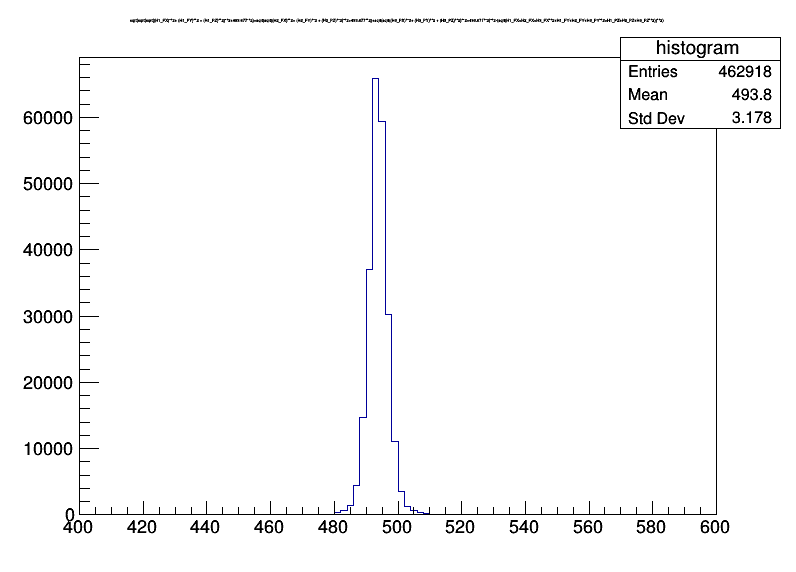

In [30]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_mass()+">>histogram(100,400,600)")
mass_histogram = ROOT.gDirectory.Get("histogram")
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


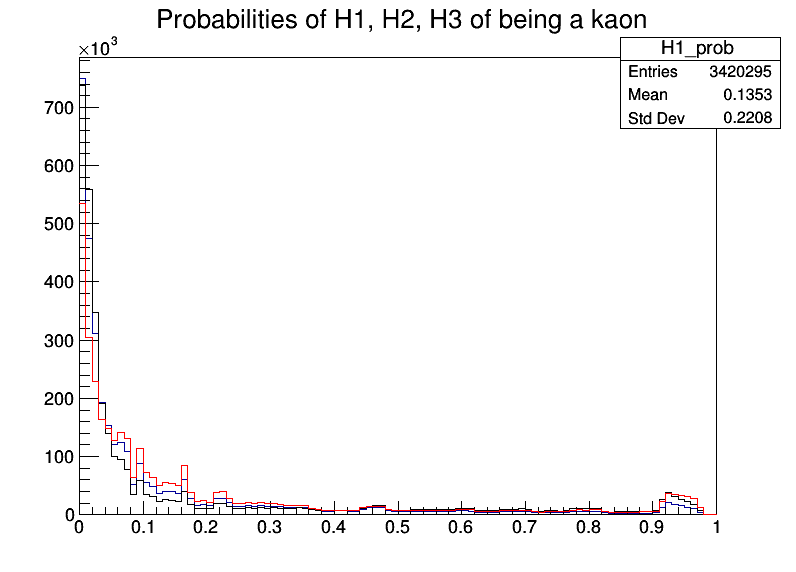

In [40]:
#Make plots of H1/H2/H3 _ProbK on one plot
d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbK>>H1_prob(100,0,1)")
tree.Draw("H2_ProbK>>H2_prob(100,0,1)")
tree.Draw("H3_ProbK>>H3_prob(100,0,1)")
histogram1 = ROOT.gDirectory.Get("H1_prob")
histogram2 = ROOT.gDirectory.Get("H2_prob")
histogram3 = ROOT.gDirectory.Get("H3_prob")
histogram1.Draw()
histogram1.SetTitle(" Probabilities of H1, H2, H3 of being a kaon")
histogram2.SetLineColor(1)
histogram2.Draw('same')
histogram3.SetLineColor(2)
histogram3.Draw('same')
d.Draw()

In [0]:
#Make plots of H1/H2/H3 _ProbK on one plot
d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("H1_ProbPi>>H1_prob(100,0,1)")
tree.Draw("H2_ProbPi>>H2_prob(100,0,1)")
tree.Draw("H3_ProbPi>>H3_prob(100,0,1)")
histogram1 = ROOT.gDirectory.Get("H1_prob")
histogram2 = ROOT.gDirectory.Get("H2_prob")
histogram3 = ROOT.gDirectory.Get("H3_prob")
histogram1.Draw()
histogram1.SetTitle(" Probabilities of H1, H2, H3 of being a kaon")
histogram2.SetLineColor(1)
histogram2.Draw('same')
histogram3.SetLineColor(2)
histogram3.Draw('same')
d.Draw()

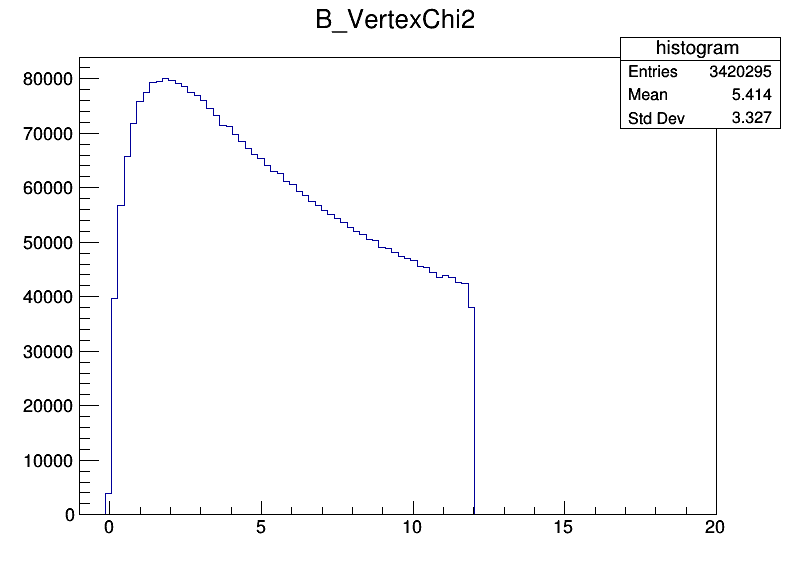

In [0]:
#For all our particles, make a plot of the B_VertexChi2

e=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw("B_VertexChi2"+">>histogram(100,-1,20)")
histogram1 = ROOT.gDirectory.Get("histogram")
e.Draw()

# Something 1

In [41]:
#To apply the selection - we can use the copytree command:
selection=("(H1_ProbPi>0.5&H2_ProbPi>0.5)&H3_ProbPi>0.5&!H1_isMuon")
CutTree=tree.CopyTree(selection)

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TBranch::TBranch::WriteBasketImpl>: basket's WriteBuffer failed.

Error in <TB

In [0]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)
#What do you notice about your histogram now?

d=(ROOT.TCanvas("myCanvasName","The Canvas Title",800,600))
tree.Draw(get_mass()+">>histogram1(100,400,600)")
CutTree.Draw(get_mass()+">>histogram2(100,400,600)")
histogram1 = ROOT.gDirectory.Get("histogram1")
histogram2 = ROOT.gDirectory.Get("histogram2")
histogram1.Draw()
histogram2.SetLineColor(1)
histogram2.Draw('same')
d.Draw()

# it is noticable the the cut removes almost all particles, leaving the second 
# diagram barely visible

In [37]:
import math
#First we define our physical measurement we want to fit using the RooRealVar
# variable=ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
m = ROOT.RooRealVar("B_Mass", "Mass", 0, 5300, "MeV/C^{2}")
#The remainder of the variables we need to pass into our model. E.g. for a gaussian, we need a mean and a width parameter to vary
#For these RooRealVar's we add three numbers, a "starting value" and min/max values

gauss_mean=ROOT.RooRealVar("gauss_mean","Mean",490,480,500)
gauss_width=ROOT.RooRealVar("gauss_width","Width",3,0,60)

#Now we have enough to make our Model for the signal:
# ROOT.RooGaussion = None
Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",m,gauss_mean,gauss_width)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.2, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",m,exponent)

m1 = ROOT.RooDataHist("B_Mass", "Mass", ROOT.RooArgList(m), mass_histogram, 1.0)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.5, 0, 1)
# just to make it work we'll set sig_frac to 0
# sig_frac = 0
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Mass): fit range of variable B_Mass expanded to nearest bin boundaries: [0,5300] --> [400,600]


In [38]:
# Put our data set into a RooDataSet structure
# data_to_fit=ROOT.RooDataSet("Data Set Cut","data_to_fit", CutTree, ROOT.RooArgSet(m))
data_to_fit=m1

# data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
 
#Then we can do the fitting:

model.fitTo(data_to_fit)

"ProbP>0.5&ProbK<0.5|ProbP=0.4"

#if everything went well, you will see the outputs of RooFit below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **   80 **SET PRINT           1
 **********
 **********
 **   81 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 exponent    -2.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 gauss_mean   4.90000e+02  2.00000e+00    4.80000e+02  5.00000e+02
     4 gauss_width   3.00000e+00  1.50000e+00    0.00000e+00  6.00000e+01
 **********
 **   82 **SET ERR         0.5
 **********
 **********
 **   83 **SET PRINT           1
 **********
 **********
 **   84 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   85 **MIGRAD        2000           1
 **********
 FI

[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Gauss' does not select any components of p.d.f.
[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Bkgnd' does not select any components of p.d.f.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


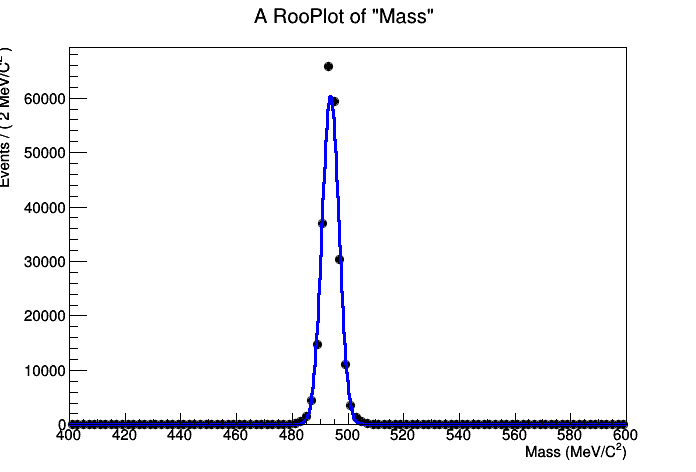

In [39]:
#Now to plot it all
c1=ROOT.TCanvas("c1","c1")
frame=m.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()